<a href="https://colab.research.google.com/github/smkmohsin/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Emotion Recognition**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# Problem Statements
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.


In [ ]:
# Importing Libaries
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading image for testing
img = cv2.imread('/content/drive/MyDrive/Almabetter/Module 7/Capstone Project/Images/happyboy.jpg')

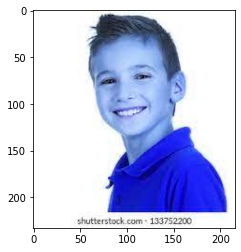

In [ ]:
plt.imshow(img) #BGR

In [ ]:
# Function to show image in RGB
def color_image(image):
  return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

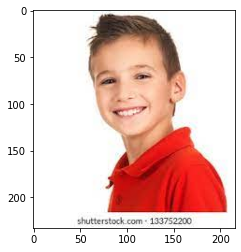

In [ ]:
color_image(img)

## We try to draw square around face

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

#function for webcam
def detect_web(image):
    faces = faceCascade.detectMultiScale(
        image=image, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img=image, pt1=(x, y), pt2=(
            x + w, y + h), color=(0, 255, 0), thickness=2)

    return image

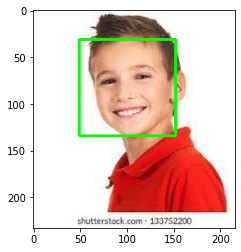

In [ ]:
color_image(detect_web(img))

## Analyzing face using DeepFace

In [ ]:
prediction = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


In [ ]:
prediction

{'age': 22,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 5.8538847380606995e-09,
  'disgust': 5.578442980984366e-11,
  'fear': 7.413362368424714e-05,
  'happy': 99.99641180038452,
  'neutral': 0.003521244798321277,
  'sad': 1.1111615627612537e-06,
  'surprise': 2.414994766664069e-09},
 'gender': 'Man',
 'race': {'asian': 0.8294166997075081,
  'black': 0.021047463815193623,
  'indian': 0.293614505790174,
  'latino hispanic': 16.046664118766785,
  'middle eastern': 9.885358810424805,
  'white': 72.92389869689941},
 'region': {'h': 101, 'w': 101, 'x': 49, 'y': 33}}

In [ ]:
prediction['dominant_emotion']

'happy'

In [ ]:
# Function for inserting text on video/image
def insert_text(image): 
    font = cv2.FONT_HERSHEY_SIMPLEX


    # Use putText() method
    cv2.putText(image,
               prediction['dominant_emotion'],
               (0, 50),
               font, 1,
               (0,0,255),
               2,
               cv2.LINE_4)
    return image

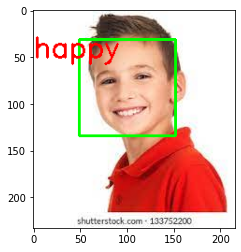

In [ ]:
color_image((insert_text(img)))

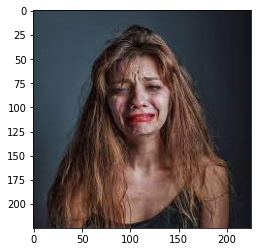

In [ ]:
# Loading image for testing
img = cv2.imread('/content/drive/MyDrive/Almabetter/Module 7/Capstone Project/Images/sadgirl.jpg')

color_image(img)

In [ ]:
prediction = DeepFace.analyze(img)

prediction

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]


{'age': 33,
 'dominant_emotion': 'sad',
 'dominant_race': 'white',
 'emotion': {'angry': 0.0005951552693696574,
  'disgust': 0.00010527158510656464,
  'fear': 43.37259491518706,
  'happy': 0.25794984913318453,
  'neutral': 0.9751912787670659,
  'sad': 55.393562042329435,
  'surprise': 1.5737142305828781e-06},
 'gender': 'Woman',
 'race': {'asian': 0.34386387560516596,
  'black': 0.009249019058188424,
  'indian': 0.2245474373921752,
  'latino hispanic': 10.066373646259308,
  'middle eastern': 10.640908032655716,
  'white': 78.71506214141846},
 'region': {'h': 78, 'w': 78, 'x': 70, 'y': 49}}

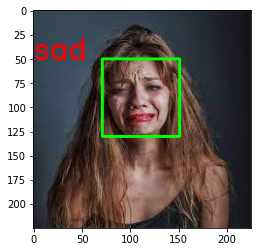

In [ ]:
color_image((insert_text(detect_web(img))))

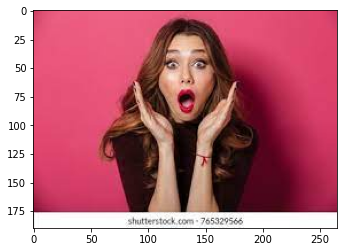

In [ ]:
# Loading image for testing
img = cv2.imread('/content/drive/MyDrive/Almabetter/Module 7/Capstone Project/Images/surprisegirl.jpg')
color_image(img)

In [ ]:
prediction = DeepFace.analyze(img)

prediction

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


{'age': 35,
 'dominant_emotion': 'surprise',
 'dominant_race': 'white',
 'emotion': {'angry': 1.3939507326199418e-06,
  'disgust': 1.1184310385818467e-14,
  'fear': 0.4399449098855257,
  'happy': 2.9664860790035164e-05,
  'neutral': 5.5403618704538e-12,
  'sad': 4.730452696222187e-08,
  'surprise': 99.56002235412598},
 'gender': 'Woman',
 'race': {'asian': 22.911110769377856,
  'black': 0.5023447663522045,
  'indian': 1.3447469359937982,
  'latino hispanic': 11.542417968223337,
  'middle eastern': 10.239865900294078,
  'white': 53.45951277500239},
 'region': {'h': 63, 'w': 63, 'x': 102, 'y': 24}}

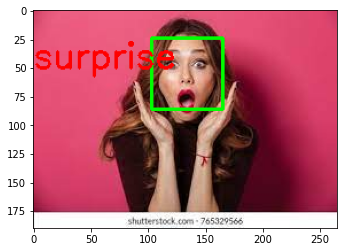

In [ ]:
color_image((insert_text(detect_web(img))))

# Realtime Emotion Detection

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
while True:
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
     
    #Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    result = DeepFace.analyze(frame, actions= ['emotion'])
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Use putText() method for
    # inseting text on video
    cv2.putText(frame,
               result['dominant_emotion'],
               (50, 50),
               font, 1,
               (0,0,255),
               2,
               cv2.LINE_4)
    
    cv2.imshow('Original Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()